In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test = pd.read_csv('test.csv')
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
len(train)

1458644

In [6]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train['store_and_fwd_flag'] = pd.Series(np.where(train.store_and_fwd_flag.values == 'Y',1,0),train.index)

In [10]:
test['store_and_fwd_flag'] = pd.Series(np.where(test.store_and_fwd_flag.values == 'Y',1,0),test.index)

In [11]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [12]:
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    if(np.isnan(lat1) or np.isnan(lon1) or np.isnan(lat2) or np.isnan(lon2)):
        return 0
    else:
        p = 0.017453292519943295     #Pi/180
        a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
        return 12742 * asin(sqrt(a))

In [13]:
def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [14]:
print(haversine_np(-73.982155,40.767937,-73.964630,40.765602))

1.94878475568


In [15]:
train['distance'] = train.apply(lambda row:distance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [16]:
test['distance'] = test.apply(lambda row:distance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [17]:
train['h_distance'] = train.apply(lambda row:haversine_np(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [18]:
test['h_distance'] = test.apply(lambda row:haversine_np(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [19]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [20]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [21]:
x = train['pickup_datetime'][0]

In [22]:
x

Timestamp('2016-03-14 17:24:55')

In [23]:
train['day'] = train['pickup_datetime'].apply(lambda x:x.day)
train['month'] = train['pickup_datetime'].apply(lambda x:x.month)
train['hour'] = train['pickup_datetime'].apply(lambda x:x.hour)
train['minute'] = train['pickup_datetime'].apply(lambda x:x.minute)

In [24]:
test['day'] = test['pickup_datetime'].apply(lambda x:x.day)
test['month'] = test['pickup_datetime'].apply(lambda x:x.month)
test['hour'] = test['pickup_datetime'].apply(lambda x:x.hour)
test['minute'] = test['pickup_datetime'].apply(lambda x:x.minute)

In [25]:
train.to_csv('updated_train.csv',index=False)
test.to_csv('updated_test.csv',index=False)

In [47]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'day', 'month', 'hour', 'minute',
       'h_distance'],
      dtype='object')

In [27]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBRegressor

In [48]:
features = ['vendor_id', 'passenger_count','store_and_fwd_flag','day', 'month', 'hour', 'minute','h_distance']

In [52]:
xgb = XGBRegressor(learning_rate =0.01, n_estimators=1000, max_depth=9,
                   min_child_weight=3, gamma=0.005, colsample_bylevel=0.60 , colsample_bytree=0.6,
                   objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27,subsample=0.7,reg_alpha=0.01)

In [53]:
xgb.fit(train[features],train['trip_duration'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.6, gamma=0.005, learning_rate=0.01,
       max_delta_step=0, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=1000, nthread=4, objective='reg:linear',
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.7)

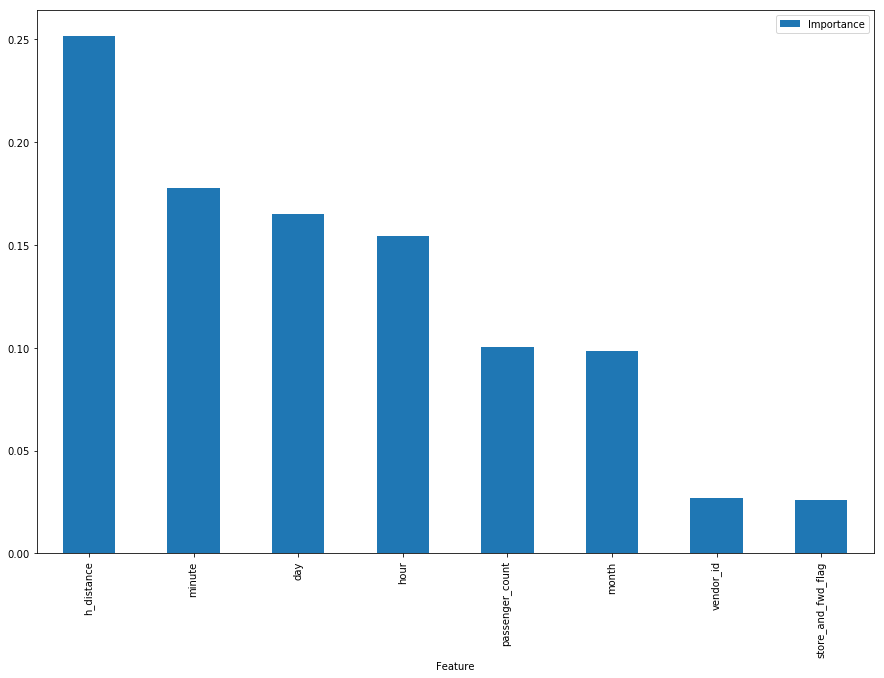

In [54]:
feature_importance = pd.Series(xgb.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [55]:
pred = xgb.predict(test[features])
print('prediction is done')

prediction is done


In [56]:
def update(x):
    if(x<0):
        return -x
    return x

In [57]:
sub = pd.DataFrame()
sub['id'] = test['id']
sub['trip_duration'] = pred

In [58]:
sub['trip_duration'] = sub['trip_duration'].apply(lambda x:update(x))

In [59]:
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.
